## <font color=green> FACTS Data: <font color=black> **emulandice** </font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr
from datetime import date
import os

# <font color=black> **__________________________________________________________________________** </font>
### <font color=blue> List of **Modules** and **Data** to be used </font>

In [2]:
# Load FACTS module names/data as a dataframe.
df = pd.read_fwf('IP_emulandice_module_submodule_dataFILE.txt',comment = '#')
#
df.insert(0, 'Num', np.arange(df.shape[0]))
#
display(df)

,Num,Component,Module,subModule,DataFile
0,0,GrIS,emulandice,GrIS,emuGrIS.emulandice.GrIS_globalsl.nc
1,1,AIS,emulandice,AIS,emuAIS.emulandice.AIS_globalsl.nc
2,2,EAIS,emulandice,AIS,emuAIS.emulandice.AIS_EAIS_globalsl.nc
3,3,WAIS,emulandice,AIS,emuAIS.emulandice.AIS_WAIS_globalsl.nc
4,4,PEN,emulandice,AIS,emuAIS.emulandice.AIS_PEN_globalsl.nc


# <font color=black> **__________________________________________________________________________** </font>
### <font color=blue> Display structure of the **.nc** file </font>

In [3]:
EXPDATE   = 221217                    # Experiment date.
SCENARIO  = ['ssp245'];                           
NUM       = 1
#        
d_nc = xr.open_dataset('/projects/kopp/facts-experiments/{}/coupling.{}/output/coupling.{}.{}'.format(EXPDATE, SCENARIO[0], SCENARIO[0],df.at[NUM,"DataFile"]))
d_nc

<xarray.Dataset>
Dimensions:           (years: 9, samples: 2000, locations: 1)
Coordinates:
  * years             (years) int32 2020 2030 2040 2050 2060 2070 2080 2090 2100
  * samples           (samples) int64 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999
  * locations         (locations) int64 -1
Data variables:
    lat               (locations) float32 ...
    lon               (locations) float32 ...
    sea_level_change  (samples, years, locations) int16 ...
Attributes:
    description:  Global SLR contribution from Antarctica using the emulandic...
    history:      Created Sat Dec 17 10:42:43 2022
    source:       FACTS: coupling.ssp245.emuAIS.emulandice.AIS. 
    baseyear:     2005
    scenario:     ssp245

# <font color=black> **__________________________________________________________________________** </font>
### <font color=blue>Extract **.nc** data \& Find Percentiles **(ALL YEARS)** </font>

In [4]:
import emu_ncTOdf as IP                       
#        
df_ptile, _ = IP.module_Fig_nc(df,SCENARIO,EXPDATE)
#display(df_ptile)

### <font color=blue> Percentiles for **(2100)** </font>

In [5]:
_ , df_ptile_100 = IP.module_Fig_nc(df,SCENARIO,EXPDATE,yrPTILE=2100)
display(df_ptile_100)

,,SSP,ssp245
,,,median(17-83)
Num,Component,Module,
0,GrIS,emulandice,7.70 (3.50 - 12.70)
1,AIS,emulandice,8.00 (2.70 - 13.90)
2,EAIS,emulandice,2.20 (-0.80 - 5.30)
3,WAIS,emulandice,4.70 (0.40 - 9.20)
4,PEN,emulandice,1.10 (0.10 - 2.00)


# <font color=black> **__________________________________________________________________________** </font>
## <font color=green> **Plot**: <font color=black> emulandice Components</font>

In [6]:
color_AIS      = np.array([0, 173,207])/255
color_GrIS     = np.array([23  ,60 ,  102])/255
color_WAIS     = np.array([231 ,29 ,  37])/255
color_EAIS     = np.array([149 ,27 ,  30])/255
color_PEN      = np.array([247 ,148,  32])/255
color_Glaciers = np.array([0, 128, 0])/255
#
COMPONENT = ['GrIS','AIS','WAIS','EAIS','PEN']

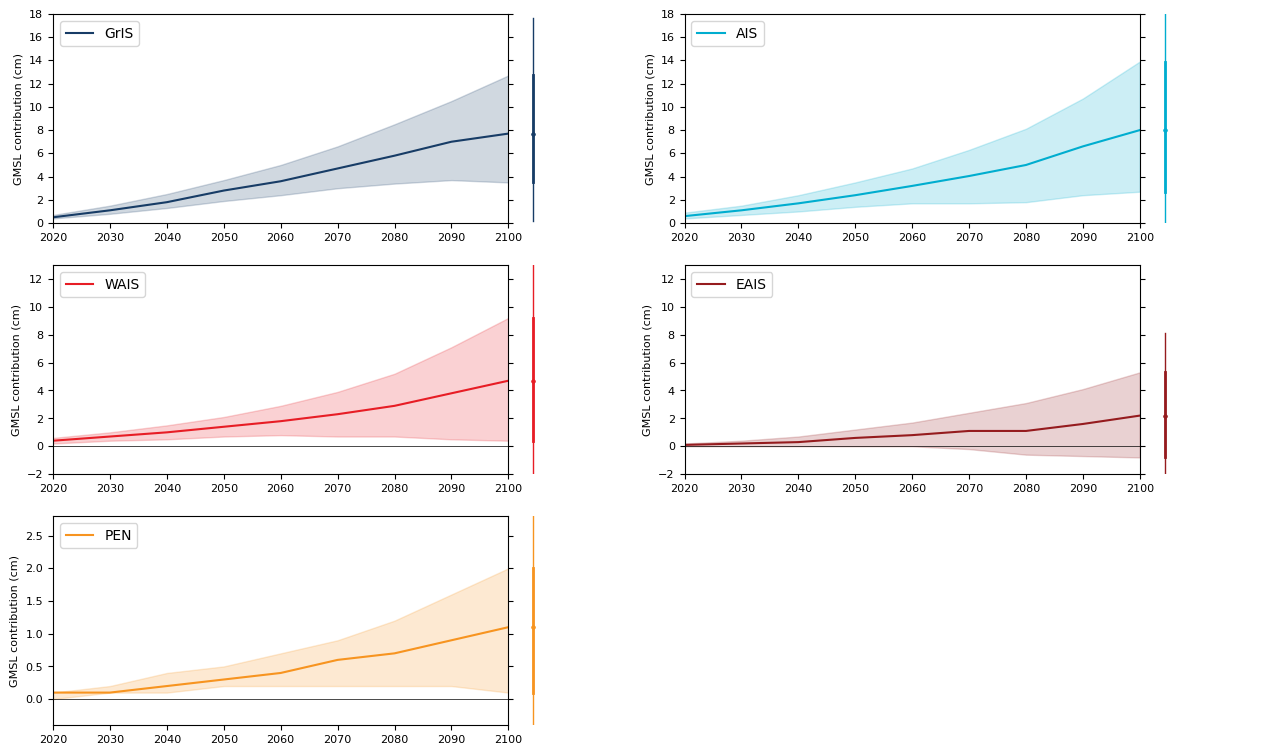

In [7]:
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(40,35), 'figure.dpi':100})
#
# Initialize the grid
grid = plt.GridSpec(4, 5, wspace=0.1, hspace=-.4)
grid00 = grid[0].subgridspec(4, 5)
grid01 = grid[1].subgridspec(4, 5)
#
XAX1        = df_ptile.loc[:,"Year"].unique()
SSP         = df_ptile.loc[:,"SSP"].unique()
module      = df_ptile.loc[:,"Module"].unique()
#
xlim, xlim1    = [2020,2100], [.1,2]
#
# Subplot Axis.
ax1_GrIS, ax2_GrIS          = plt.subplot(grid00[0, :4]),    plt.subplot(grid00[0, 4]);
ax1_WAIS, ax2_WAIS      = plt.subplot(grid00[1, :4]),    plt.subplot(grid00[1, 4]);
ax1_PEN,      ax2_PEN      = plt.subplot(grid00[2, :4]),    plt.subplot(grid00[2, 4]);
#
ax1_AIS,      ax2_AIS         = plt.subplot(grid01[0, :4]),    plt.subplot(grid01[0, 4]);
ax1_EAIS, ax2_EAIS        = plt.subplot(grid01[1, :4]),    plt.subplot(grid01[1, 4]);
# ax1_, ax2_         = plt.subplot(grid01[2, :4]),    plt.subplot(grid01[2, 4]);
#
#
for component in COMPONENT: 
    #
    ax1 = eval(f'ax1_{component}');    ax2 = eval(f'ax2_{component}')
    #
    # Plot Left
    Yax50        = df_ptile[df_ptile["Component"] == component]["col_50" ].values 
    Yax17        = df_ptile[df_ptile["Component"] == component]["col_17" ]
    Yax83        = df_ptile[df_ptile["Component"] == component]["col_83" ]
    #
    ax1.plot(XAX1, Yax50, label = f'{component}', color = eval(f'color_{component}'))
    ax1.fill_between(XAX1, Yax17, Yax83, color = eval(f'color_{component}'), alpha=0.2)
    ax1.axhline(y=0, color='black', linewidth=0.5)
    #
    # Plot Right
    XAX2  = np.array([[.2,.2]]) 
    Yax2_1 = df_ptile.loc[((df_ptile["Component"] == component) & (df_ptile['Year'] == 2100)),("col_5", "col_95") ].values
    Yax2_2 = df_ptile.loc[((df_ptile["Component"] == component) & (df_ptile['Year'] == 2100)),("col_17", "col_83") ].values 
    Yax2_3 = df_ptile.loc[((df_ptile["Component"] == component) & (df_ptile['Year'] == 2100)),("col_50","col_50") ].values 
    ax2.plot(XAX2.transpose(), Yax2_1.transpose(),color = eval(f'color_{component}'),linewidth=1)
    ax2.plot(XAX2.transpose(), Yax2_2.transpose(),color = eval(f'color_{component}'),linewidth=2)
    ax2.plot(XAX2.transpose(), Yax2_3.transpose(), color = eval(f'color_{component}'),marker = 'o',ms = 2,mfc='none')
    #
    # Dynm Ylim
    yLOW = np.min(Yax2_1[0]); yHIG = np.max(Yax2_1[0]);  
    if yLOW > 0:  yLOW = 0
    ylim =[yLOW, yHIG]
    #
    # Use Common Yaxis limits across panels.
    if component == 'GrIS':  ylim =[0, 18]
    if component == 'AIS':  ylim =[0, 18]
    if component == 'WAIS':  ylim =[-2, 13]
    if component == 'EAIS':  ylim =[-2, 13]
    #
    ax1.legend(loc='upper left',prop={'size': 10}); 
    #
    ax1.tick_params(axis='both', labelsize=8)
    ax1.yaxis.set_ticks_position('both')
    #
    ax1.set_xlim(xlim); ax1.set_ylim(ylim)
    ax2.set_ylim(ylim); ax2.axis('off'); ax2.set_xlim(xlim1);
    #
    ax1.set_ylabel("GMSL contribution (cm)", size=8);
    # ax1.text(.27, .77,module[0], horizontalalignment='right',verticalalignment='top',weight='bold',fontsize=8,transform=ax1.transAxes)
#
today = date.today().strftime('%Y-%m-%d')
# Save Figure.
figureNAME = "Fig_emulandice-"+today+".pdf"+today+".pdf" 
if os.path.exists(figureNAME): os.remove(figureNAME)
# plt.savefig(figureNAME, format="pdf", bbox_inches="tight")
#
plt.show()

# <font color=black> **------------------------------------------------------------------------** </font>
## <font color=green> **re-Plot**: <font color=black> 1cm ==> 3600Gt of fresh water</font>

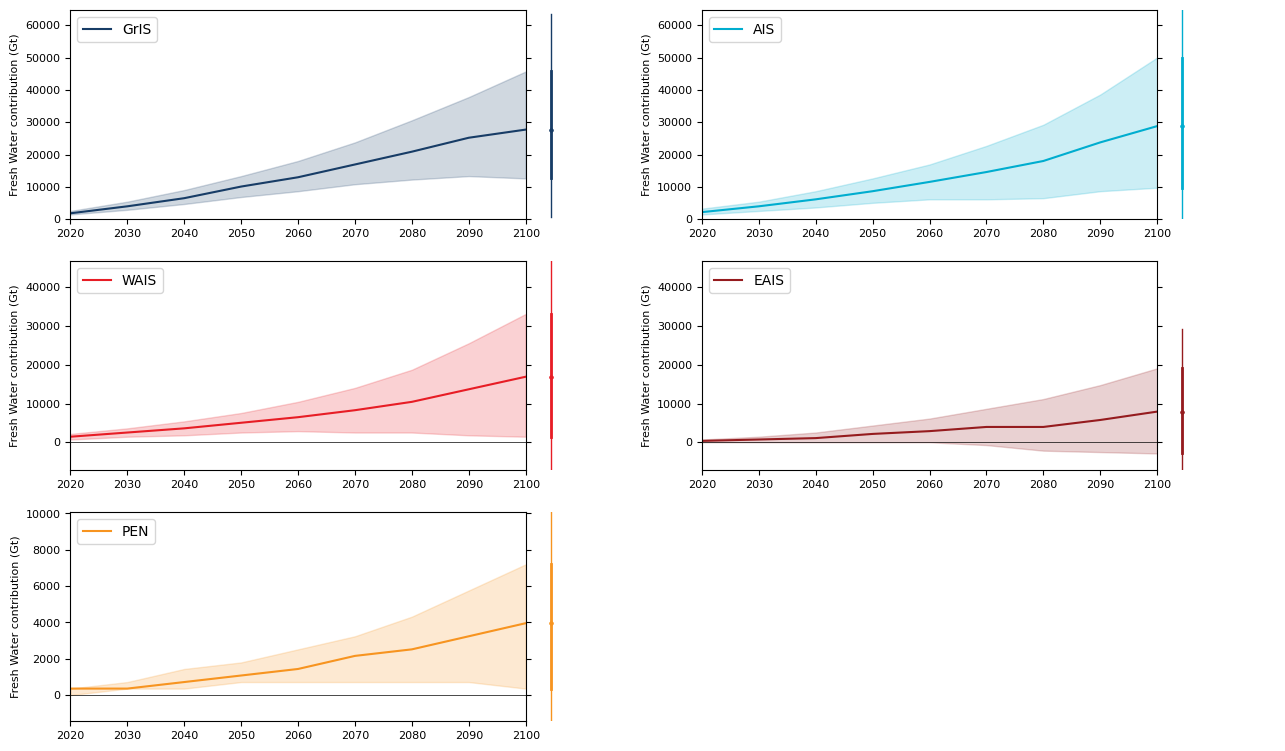

In [8]:
gt=3600
#
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(40,35), 'figure.dpi':100})
#
# Initialize the grid
grid = plt.GridSpec(4, 5, wspace=0.1, hspace=-.4)
grid00 = grid[0].subgridspec(4, 5)
grid01 = grid[1].subgridspec(4, 5)
#
XAX1        = df_ptile.loc[:,"Year"].unique()
SSP         = df_ptile.loc[:,"SSP"].unique()
module      = df_ptile.loc[:,"Module"].unique()
#
xlim, xlim1    = [2020,2100], [.1,2]
#
# Subplot Axis.
ax1_GrIS, ax2_GrIS          = plt.subplot(grid00[0, :4]),    plt.subplot(grid00[0, 4]);
ax1_WAIS, ax2_WAIS      = plt.subplot(grid00[1, :4]),    plt.subplot(grid00[1, 4]);
ax1_PEN,      ax2_PEN      = plt.subplot(grid00[2, :4]),    plt.subplot(grid00[2, 4]);
#
ax1_AIS,      ax2_AIS         = plt.subplot(grid01[0, :4]),    plt.subplot(grid01[0, 4]);
ax1_EAIS, ax2_EAIS        = plt.subplot(grid01[1, :4]),    plt.subplot(grid01[1, 4]);
# ax1_, ax2_         = plt.subplot(grid01[2, :4]),    plt.subplot(grid01[2, 4]);
#
#
for component in COMPONENT: 
    #
    ax1 = eval(f'ax1_{component}');    ax2 = eval(f'ax2_{component}')
    #
    # Plot Left
    Yax50        = df_ptile[df_ptile["Component"] == component]["col_50" ].values 
    Yax17        = df_ptile[df_ptile["Component"] == component]["col_17" ]
    Yax83        = df_ptile[df_ptile["Component"] == component]["col_83" ]
    #
    Yax50, Yax17, Yax83 = Yax50*gt, Yax17*gt, Yax83*gt
    #
    ax1.plot(XAX1, Yax50, label = f'{component}', color = eval(f'color_{component}'))
    ax1.fill_between(XAX1, Yax17, Yax83, color = eval(f'color_{component}'), alpha=0.2)
    ax1.axhline(y=0, color='black', linewidth=0.5)
    #
    # Plot Right
    XAX2  = np.array([[.2,.2]]) 
    Yax2_1 = df_ptile.loc[((df_ptile["Component"] == component) & (df_ptile['Year'] == 2100)),("col_5", "col_95") ].values
    Yax2_2 = df_ptile.loc[((df_ptile["Component"] == component) & (df_ptile['Year'] == 2100)),("col_17", "col_83") ].values 
    Yax2_3 = df_ptile.loc[((df_ptile["Component"] == component) & (df_ptile['Year'] == 2100)),("col_50","col_50") ].values 
    #
    Yax2_1, Yax2_2, Yax2_3 = Yax2_1*gt, Yax2_2*gt, Yax2_3*gt
    #
    ax2.plot(XAX2.transpose(), Yax2_1.transpose(),color = eval(f'color_{component}'),linewidth=1)
    ax2.plot(XAX2.transpose(), Yax2_2.transpose(),color = eval(f'color_{component}'),linewidth=2)
    ax2.plot(XAX2.transpose(), Yax2_3.transpose(), color = eval(f'color_{component}'),marker = 'o',ms = 2,mfc='none')
    #
    # Dynm Ylim
    yLOW = np.min(Yax2_1[0]); yHIG = np.max(Yax2_1[0]);  
    if yLOW > 0:  yLOW = 0
    ylim =[yLOW, yHIG]
    #
    # Use Common Yaxis limits across panels.
    if component == 'GrIS':  ylim =[0, 18*gt]
    if component == 'AIS':  ylim =[0, 18*gt]
    if component == 'WAIS':  ylim =[-2*gt, 13*gt]
    if component == 'EAIS':  ylim =[-2*gt, 13*gt]
    #
    ax1.legend(loc='upper left',prop={'size': 10}); 
    #
    ax1.tick_params(axis='both', labelsize=8)
    ax1.yaxis.set_ticks_position('both')
    #
    ax1.set_xlim(xlim); ax1.set_ylim(ylim)
    ax2.set_ylim(ylim); ax2.axis('off'); ax2.set_xlim(xlim1);
    #
    ax1.set_ylabel("Fresh Water contribution (Gt)", size=8);
    # ax1.text(.27, .77,module[0], horizontalalignment='right',verticalalignment='top',weight='bold',fontsize=8,transform=ax1.transAxes)
#
today = date.today().strftime('%Y-%m-%d')
# Save Figure.
figureNAME = "Fig_emulandice-"+today+".pdf"+today+".pdf" 
if os.path.exists(figureNAME): os.remove(figureNAME)
# plt.savefig(figureNAME, format="pdf", bbox_inches="tight")
#
plt.show()